# **Functions performed (Recapitulation)**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

ModuleNotFoundError: No module named 'scipy'

In [3]:
def forward_euler(fun,y_0,T,n):
  tam=T/n;
  y=np.zeros((np.size(y_0),n+1))
  y[:,0]=y_0
  for k in range(n):
    y[:,k+1]=y[:,k]+tam*fun(k*tam,y[:,k])
  return y

In [4]:
def SIR_MODEL(t,beta,gamma,s,i):
  return np.array([-beta(t)*s*i,beta(t)*s*i-gamma(t)*i])

In [5]:
def vSEIR_MODEL(t,s,e,i,beta,gamma,v_rel,kapa):
  return np.array([-beta(t)*s*i-min(s,v_rel(t)),beta(t)*s*i-kapa(t)*e,kapa(t)*e-gamma(t)*i])

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
def dictionary(text):
  d={}
  with text as t:
    for line in t:
       (key, val) = line.split()
       d[key] = val
  for val in d:
    d[val]=float(d[val])
  return d

In [ ]:
# READING FILES
p = open('/content/drive/MyDrive/Solving Models of Mathematical Epidemiology in Python/SIR-Cloud/Ressources/Param.txt','r')
t1 = open('/content/drive/MyDrive/Solving Models of Mathematical Epidemiology in Python/SIR-Cloud/Ressources/Test1.txt','r')
t2= open('/content/drive/MyDrive/Solving Models of Mathematical Epidemiology in Python/SIR-Cloud/Ressources/Test2.txt','r')

In [ ]:
param=dictionary(p)
print('parameters= ',param)

test1=dictionary(t1)
print('test1= ',test1)

test2=dictionary(t2)
print('test2= ',test2)

#print(test1['k'])
#print(test2['k'])

parameters=  {'beta_0': 0.5, 'gamma': 0.15, 'kappa': 0.25, 'N': 83000000.0}
test1=  {'s_0': 0.99999, 'e_0': 0.0, 'i_0': 1e-05, 'k': 0.3, 'v_rel': 0.0}
test2=  {'s_0': 0.99999, 'e_0': 0.0, 'i_0': 1e-05, 'k': 0.4, 'v_rel': 0.0025}


# **PART OF EXERCISE 5** 
Construct a third setting test_3 of your choice
with non-constant $k$ and $v_{rel}$ and test it as well.\
Considering for test3:\
$s_{0}=0.99999$\
$e_{0}=0.0$\
$i_{0}=1e-05$\
$\beta_{0}=0.5$\
$\gamma_{0}=0.15$\
$\kappa=0.25$\
Nonconstant $k(t)=0.3(1 + \sin{(2\pi \times 0.05t)})$\
Nonconstant $v_{rel}(t)=\frac{0.01}{(1+e^{-0.1(t-200)})}$


In [ ]:
ti = 0
tf = 240  # number of hours (10 days) Obs. For tf>8000 the graph is distorted
n = 1000
time_points = ti + (tf-ti)/(n+1) * np.arange(n+1) 

In [1]:
s0=0.99999
e0=0.0
i0=10**(-5)

beta0=0.5
gamma0=0.15
kappa0=0.25

k = lambda t: (1 + np.sin(0.05*t  * 2 * np.pi)) * 0.3
vrel = lambda t: 0.01 / (1 + np.exp(- 0.1*(t - 200)))

gamma = lambda t:gamma0
beta = lambda t : beta0*(1-k(t)) 

kappa=lambda t: kappa0

y0_test3 = np.array([s0, e0, i0]) 
vSEIR_test3 = lambda t, y: vSEIR_MODEL(t,y[0],y[1],y[2],beta,gamma,vrel,kappa)

y_test3=forward_euler(vSEIR_test3,y0_test3,tf,n)

scaleFactor = 1.2
plt.figure(figsize = (8*scaleFactor,6*scaleFactor))

plt.plot(time_points, y_test3[0,:], color='r', linewidth=2.0, label = '$s(t)$')
plt.plot(time_points, y_test3[1,:], color='m', linewidth=2.0, label = '$e(t)$')
plt.plot(time_points, y_test3[2,:], color='b', linewidth=2.0, label = '$i(t)$ ')
plt.plot(time_points, 1-y_test3[0,:]-y_test3[1,:]-y_test3[2,:], color='g', linewidth=2.0, label = '$r(t)$')
plt.title('vSEIR model for nonconstant $k$ and $v_{rel}$')
plt.xlabel('Time [hours]')
plt.ylabel('s(t), e(t), i(t), r(t)')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()


NameError: name 'np' is not defined

Plot the resulting curves for $i$ for all test settings in a single graph.


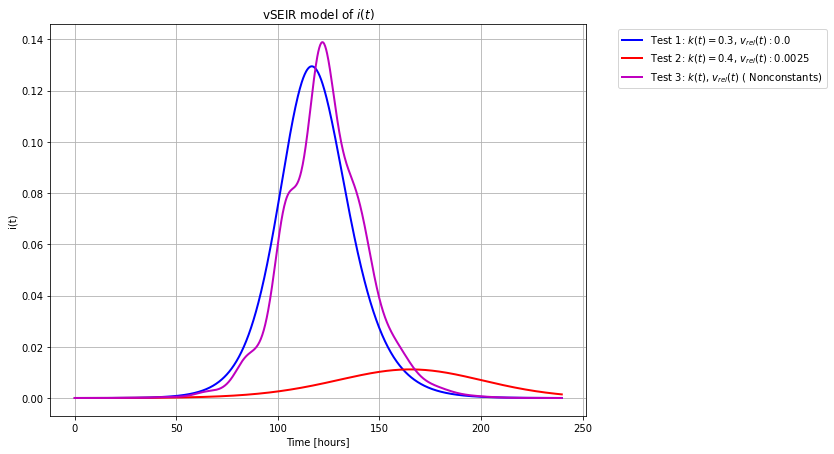

In [ ]:
# params 
beta0=param['beta_0']
gamma = lambda t:param['gamma']
kappa=lambda t: param['kappa']

#for test 1
s0_test1=test1['s_0']
e0_test1=test1['e_0']
i0_test1=test1['i_0']
k_test1=test1['k']
beta_test1 = lambda t : beta0*(1-k_test1) 
vrel_test1=lambda t:1.0*test1['v_rel'] 


y0_test1 = np.array([s0_test1, e0_test1, i0_test1]) 
vSEIR_test1 = lambda t, y: vSEIR_MODEL(t,y[0],y[1],y[2],beta_test1,gamma,vrel_test1,kappa)
y_test1=forward_euler(vSEIR_test1,y0_test1,tf,n)


#for test 2 
s0_test2=test2['s_0']
e0_test2=test2['e_0']
i0_test2=test2['i_0']
k_test2=test2['k']
beta_test2 = lambda t : beta0*(1-k_test2) 
vrel_test2=lambda t:1.0*test2['v_rel'] 


y0_test2 = np.array([s0_test2, e0_test2, i0_test2]) 
vSEIR_test2 = lambda t, y: vSEIR_MODEL(t,y[0],y[1],y[2],beta_test2,gamma,vrel_test2,kappa)
y_test2=forward_euler(vSEIR_test2,y0_test2,tf,n)


scaleFactor = 1.2
plt.figure(figsize = (8*scaleFactor,6*scaleFactor))


plt.plot(time_points, y_test1[2,:], color='b', linewidth=2.0, label = 'Test 1: $k(t)= 0.3$, $v_{rel}(t): 0.0$  ')
plt.plot(time_points, y_test2[2,:], color='r', linewidth=2.0, label = 'Test 2: $k(t)= 0.4$, $v_{rel}(t): 0.0025$  ')
plt.plot(time_points, y_test3[2,:], color='m', linewidth=2.0, label = 'Test 3: $k(t)$, $v_{rel}(t)$ ( Nonconstants) ')

plt.title('vSEIR model of $i(t)$')
plt.xlabel('Time [hours]')
plt.ylabel('i(t)')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid(True)
plt.show()

# **PART OF EXERCISE 6**
Perform the same calculations for the settings test_2 and test_3. Do the results of $i(τ ) + r(τ )$ and total_infected coincide? If not, why?

In [ ]:
# y = (s, e, i)
# y[0] = s
# y[1] = e
# y[2] = i
def total_infected(y, kappa, N, T,n,tau):
  i_total = y[2][0]  
  h = T/(n)
  k = 1
  while (k < tau):
    i_total = i_total + h*kappa*y[1][k-1] 
    k = k + 1
  return N * i_total

# N=S+E+I+R
# I(t)+R(t)=N-S(t)-E(t)
# S=y[0][:], E=y[1][:], I=y[2][:]

kappa = param['kappa']
N = param['N']
T=tf
# ti=ih
tau=20

# For test 2
N_inf_test2=total_infected(y_test2, kappa, N, T,n,tau)
print('Total population N= ',N)
print('N_inf= ',N_inf_test2)
print('i+r= ',N*(1-y_test2[0][tau]-y_test2[1][tau]))
#print('i+r= ',N*(1-y_test2[0][tau*n//T]-y_test2[1][tau*n//T]))



Total population N=  83000000.0
N_inf=  1223.9211185028455
i+r=  997259.2635100861


In [ ]:
# For test 3
N_inf_test3=total_infected(y_test3, kappa, N, T,n,tau)
print('Total population N= ',N)
print('N_inf= ',N_inf_test3)
print('i+r= ',N*(1-y_test3[0][tau]-y_test3[1][tau]))
#print('i+r= ',N*(1-y_test2[0][tau*n//T]-y_test2[1][tau*n//T]))


Total population N=  83000000.0
N_inf=  1212.4460620634854
i+r=  1242.2249821067155


#  **EXERCISE 7**
Consider now the settings test_2 and test_3. Compute $N_{inf}$ for every single day and save the resulting data to the files totalInf2.txt and totalInf3.txt.


In [ ]:

def total_infected_w(y, kappa, N, T,n,string):
  i_total = y[2][0]  
  h = T/(n)
  file = open (string,'w')
  for k in range(len(y[2][:])):
    i_total = i_total + h*kappa*y[1][k]
    N_inf=N*i_total 
    number=str(N_inf)+'\n'
    file.write(number) 
      
  file.close()


In [ ]:
total_infected_w(y_test2, kappa, N, T,n,'totalInf2.txt')
total_infected_w(y_test3, kappa, N, T,n,'totalInf3.txt')

#  **EXERCISE 8**
Create phase portraits for every setting. Choose $s$ as x-axis and $i$ as y-axis. Draw the trajectories for different initial values $(s_{0}, i_{0})$. You may omit the starting values provided by the particular setting and you may use the tool provided in DrawArrows.py. Interpret every phase portrait.


In [ ]:

def draw_arrow(line, position=None, direction='rechts', size=15, color=None):
    
    if color is None:
        color = line.get_color()

    x_daten = line.get_xdata()
    y_daten = line.get_ydata()

    if position is None:
        position = y_daten.mean()
        
    # Get enxt appropriate index
    start_ind = np.argmin(np.abs(y_daten - position))
    
    if direction == 'rechts':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(x_daten[start_ind], y_daten[start_ind]),
        xy=(x_daten[end_ind], y_daten[end_ind]),
        arrowprops = dict(arrowstyle = "->", color = color),
        size = size
    )
    return


In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        } 

def generate_phase_portrait( F,n,T,font):
    # Pick 10 different starting points with s_0 + i_0 = 1
    myInitialS = (1+np.arange(10))/11
    plt.figure()
    for s in myInitialS:
        x0 = np.array([s, 0, 1-s])
        sol=forward_euler(F,x0,T,n)
        line = plt.plot( sol[0,:], sol[2,:], 'r--')[0]
        draw_arrow(line, position = 0.075)  
    plt.xlabel('Susceptible',fontdict=font)
    plt.ylabel('Infected',fontdict=font)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.grid()
    startingPoints = np.linspace(0,1,500)
    plt.plot( 1-startingPoints, startingPoints, 'b-')

In [ ]:
def vSEIR_MODEL_mod(beta0,gamma,kappa,k,vrel):
  beta=lambda t: beta0*(1-k(t))
  F=lambda t,y: np.array([-beta(t)*y[0]*y[2]-min(y[0],vrel(t)),
                          beta(t)*y[0]*y[2]-kappa*y[1],
                          kappa*y[1]-gamma*y[2]])
  return F

Text(0.5, 1.0, 'Phase portrait for test 1')

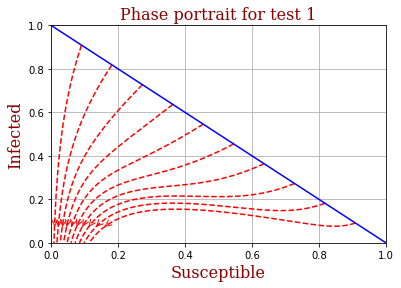

In [ ]:
F_test1=vSEIR_MODEL_mod(param['beta_0'],param['gamma'],param['kappa'],lambda t:test1['k'],lambda t:test1['v_rel'])
generate_phase_portrait( F_test1,n,T,font)
plt.title('Phase portrait for test 1',font)

Text(0.5, 1.0, 'Phase portrait for test 2')

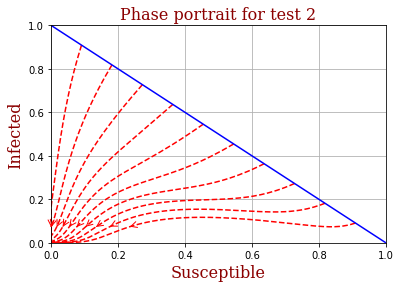

In [ ]:
F_test2=vSEIR_MODEL_mod(param['beta_0'],param['gamma'],param['kappa'],lambda t:test2['k'],lambda t:test2['v_rel'])
generate_phase_portrait( F_test2,n,T,font)
plt.title('Phase portrait for test 2',font)

Text(0.5, 1.0, 'Phase portrait for test 3')

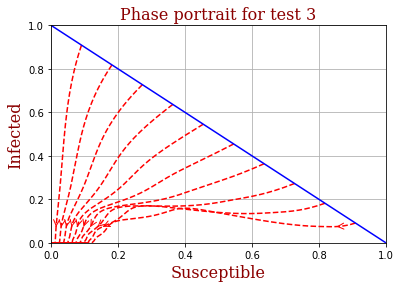

In [ ]:

k = lambda t: (1 + np.sin(0.05*t  * 2 * np.pi)) * 0.3
vrel = lambda t: 0.01 / (1 + np.exp(- 0.1*(t - 200)))

F_test3=vSEIR_MODEL_mod(param['beta_0'],param['gamma'],param['kappa'],k,vrel)
generate_phase_portrait( F_test3,n,T,font)
plt.title('Phase portrait for test 3',font)

#  **EXERCISE 9**
We want to analyze the behavior of the vSEIR-model in an adaptive lockdown strategy. 
We assume a simple lockdown strategy depending on the number of active infections:
-   If there is no active lockdown we have $k(t) = k_{a}$, during an active lockdown we have reduced contacts and $k(t) = k_{b}$ with $0 ≤ k_{a} < k_{b} ≤ 1$. 
-   We start our simulation without an active lockdown. Once the
number of infectious individuals reaches or surpasses a threshold $i_{b}$ we start a lockdown until the number of infectious individuals decreases below $i_{a}$ where $0 < i_{a} < i_{b} ≤ 1$.

Write a pseudocode that is suitable for simulating this strategy involving the vSEIR-model. Implement your pseudocode in a function $\textbf{adaptive_euler}$. Pick $k_{a} = 0.4$, $k_{b} = 0.8$ and $i_{a}$ and $i_{b}$ of your choice. \
Plot and analyse the resulting curves for every scenario. 
Do the lockdown strategies prove useful or could you think of a differe?.

**Remark:** $\beta$ depends on the infectiousness and on the number of average contacts this parameter will change over time, e.g. due to lockdowns.
$\beta(t) = \beta_{0} (1 − k(t))$ where $ \beta_{0}$ corresponds to the infectiousness of the disease without any counter measures and
$k(t)$ describes the reduction of contacts.


In [ ]:
def adaptative_euler(tf,n,y0,vrel,ia,ib):

  time_points = 0 + (tf-0)/(n+1) * np.arange(n+1) 
  ka=0.4
  kb=0.8
  gamma = lambda t:param['gamma']
  kappa=lambda t: param['kappa']

  beta = lambda t : param['beta_0']*(1-ka)
  vSEIR = lambda t, y: vSEIR_MODEL(t,y[0],y[1],y[2],beta,gamma,vrel,kappa)
  y=forward_euler(vSEIR,y0,tf,n)

  result1=[]
  result2=[]
  time1=[]
  time2=[]

  j=0
  bol=False 
  while y[2][j]<ib:
    result1.append(y[2][j])
    time1.append(time_points[j])
    bol=True
    j=j+1
    
  if bol:
    beta = lambda t : param['beta_0']*(1-kb)
    vSEIR2 = lambda t, y: vSEIR_MODEL(t,y[0],y[1],y[2],beta,gamma,vrel,kappa)
    y2=forward_euler(vSEIR2,y0,tf,n)
    
    for p in range(len(y2[2][:])):
        if y2[2][p]<ia:
          result2.append(y2[2][p])
          time2.append(time_points[p])

  r1=np.asarray(result1)
  r2=np.asarray(result2)
  t1=np.asarray(time1)
  t2=np.asarray(time2)
  
 #--------------------------------------
 # PROPERTIES OF PLOTTING
 #--------------------------------------
  
  plt.rc('font', family='serif')
  plt.rcParams.update({'font.size': 12})
  plotaspect = 2/3

  scaleFactor = 1.2
  fig=plt.figure(figsize = (8*scaleFactor,6*scaleFactor),facecolor='w')
  

  ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
  ax.plot(t1, r1, 'b', alpha=0.5, lw=3.0,label='No active lockdown: $k_{a}=0.4$')
  ax.plot(t2, r2, 'r', alpha=0.5, lw=3.0, label='Active lockdown: $k_{b}=0.8$')
  ax.set_xlabel('Time /hours')
  ax.set_ylabel('Number of infections')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)

  plt.show()


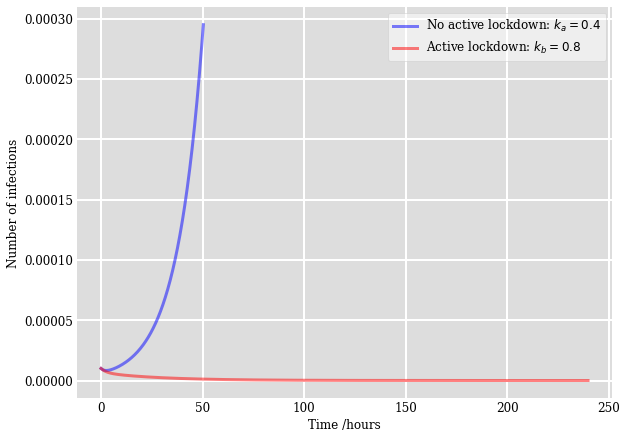

In [ ]:
ib=3*10**(-4)
ia=10**(-4)

tf = 240  # number of hours (10 days) Obs. For tf>8000 the graph is distorted
n = 1000

#for test 1
s0_test1=test1['s_0']
e0_test1=test1['e_0']
i0_test1=test1['i_0']

vrel_test1=lambda t:1.0*test1['v_rel'] 
y0_test1 = np.array([s0_test1, e0_test1, i0_test1]) 

vrel_test1=lambda t:1.0*test1['v_rel'] 

adaptative_euler(tf,n,y0_test1,vrel_test1,ia,ib)



# **HOMEWORK**

-  Implement RK4 and ploting with Forward Euler in a single graph for solving vSEIR model (Test 3).


## The $4^{th}$ order Runge-Kutta method:
$k_{1}=F(t,y_{n})\\
k_{2}=F(t+\frac{h}{2},y_{n}+\frac{k_{1}}{2}) \\
k_{3}=F(t+\frac{h}{2},y_{n}+\frac{k_{2}}{2}) \\
k_{4}=F(t+h,y_{n})\\ 
k_{n+1}=y_{n}+\frac{h}{6}(k_{1}+2k_{2}+2k_{3}+k_{4})\\ $ 

to solve the vSEIR model, the ecuation can be written as

$s'(t)=f(s,e,i,t)=\beta s(t)i(t)-min(s(t),v_{rel}(t))\\
e'(t)=g(s,e,i,t)=\beta s(t)i(t)- \kappa e(t)\\
i'(t)=w(s,e,i,t)=\kappa e(t)-\gamma i(t)$


$\frac{dy }{dt} =F(t,y),\ $ 
$y=\begin{bmatrix}
 s(t)\\
 e(t)\\
 i(t)\\
\end{bmatrix} $  with $F(t,y)=\begin{bmatrix}
f(s,e,i,t)\\
g(s,e,i,t)\\
w(s,e,i,t)\\
\end{bmatrix} $


In [ ]:
def rk4(fun,T,n,y0): 
  h=T/(n-1)
  #time=np.arange(n)*h
  time = (T)/(n+1) * np.arange(n+1) 
  y=np.zeros((n+1,np.size(y0)))
  yvals=np.copy(y0)
  for j,t in enumerate(time):
    y[j,:] = yvals
    k0 = h*fun(t, yvals)
    k1 = h*fun(t+h/2, yvals+k0/2)
    k2 = h*fun(t+h/2, yvals+k1/2)
    k3 = h*fun(t+h, yvals+k2)
    yvals += (k0 + 2*k1 + 2*k2 + k3)/6
  #plt.plot(time,y)
  return y.T

In [ ]:
# ******* TEST 3 *******
s0=0.99999
e0=0.0
i0=10**(-5)

y0_test3 = np.array([s0, e0, i0]) 

k = lambda t: (1 + np.sin(0.05*t  * 2 * np.pi)) * 0.3
vrel = lambda t: 0.01 / (1 + np.exp(- 0.1*(t - 200)))

gamma = lambda t:param['gamma']
beta = lambda t :param['beta_0']*(1-k(t)) 
kappa=lambda t: param['kappa']


In [ ]:
vSEIR_test3 = lambda t, y: vSEIR_MODEL(t,y[0],y[1],y[2],beta,gamma,vrel,kappa)
'''
Runge-Kutta Method 
'''
y_test3_rk=rk4(vSEIR_test3,tf,n,y0_test3)
'''
Forward-Euler Method 
'''
y_test3_euler=forward_euler(vSEIR_test3,y0_test3,tf,n)


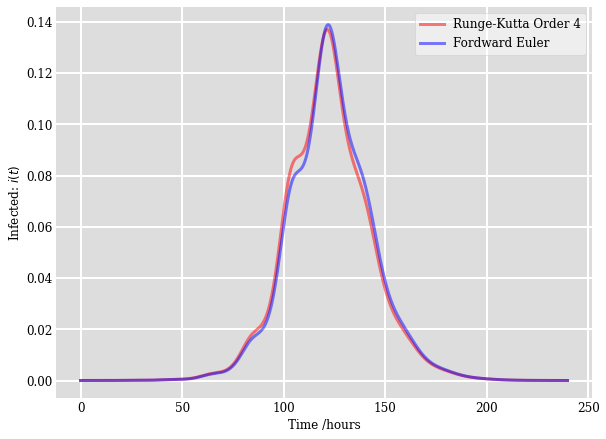

In [ ]:
'''
*** PLOTING ***
'''
i_rk=y_test3_rk[2][:]
i_euler=y_test3_euler[2][:]

#s_rk=y_test3_rk[0][:]
#s_euler=y_test3_euler[0][:]

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 12})
plotaspect = 2/3

scaleFactor = 1.2
fig=plt.figure(figsize = (8*scaleFactor,6*scaleFactor),facecolor='w')
  
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(time_points, i_rk, 'r', alpha=0.5, lw=3.0,label='Runge-Kutta Order 4')
ax.plot(time_points, i_euler, 'b', alpha=0.5, lw=3.0, label='Fordward Euler')
ax.set_xlabel('Time /hours')
ax.set_ylabel('Infected: $i(t)$')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
   ax.spines[spine].set_visible(False)

plt.show()


In [ ]:
def ODEsolver(fun,y0,a,b,n):
    
    # set step size
    h = (b - a)/n
    
    # initialize solution 
    y = np.zeros((np.size(y0),n+1))
    
    # set initial value
    y[:,0] = y0
    
    r = ode(fun).set_integrator('vode', method='bdf')
    r.set_initial_value(y0, a)#.set_f_params(2.0).set_jac_params(2.0)
    for k in np.arange(n):
        y[:,k] = r.integrate(r.t+h)
    
    return y


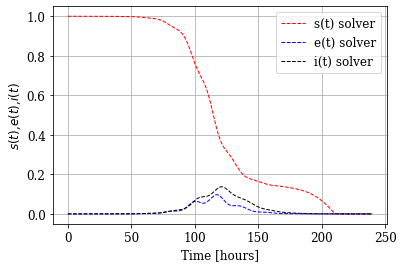

In [ ]:
z = ODEsolver(vSEIR_test3,y0_test3, 0, tf, n)

plt.plot(time_points, z[0,:], color='r', ls = '--', linewidth=1.0, label = 's(t) solver')
plt.plot(time_points, z[1,:], color='b', ls = '--', linewidth=1.0, label = 'e(t) solver')
plt.plot(time_points, z[2,:], color='k', ls = '--', linewidth=1.0, label = 'i(t) solver')
#plt.title(f'Temporal development of the SIR model for R_0={R_0}')
plt.xlabel('Time [hours]')
plt.ylabel('$s(t)$,$e(t)$,$i(t)$')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()